In [20]:
import pickle
import numpy as np
import random
import csv
import time
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
def readData(datafile):
    datafileImport="data/"+datafile
    #datafileExport="data2/"+datafile
    infile = open(datafileImport, 'rb')
    new_dict = pickle.load(infile)
    #found_dict=new_dict.loc[new_dict['product_id'].isin(random_ids)]
    #file = open(datafileExport, 'wb')
    #pickle.dump(found_dict, file)
    #file.close()
    return new_dict

salesData="TY_Koc_Sales.pkl"
basket="TY_Koc_Basket.pkl"
fav="TY_Koc_Fav.pkl"
gender="TY_Koc_Gender.pkl"
impression="TY_Koc_Impression.pkl"
price="TY_Koc_Price.pkl"
demand="TY_Koc_Quantity_Demand.pkl"
quantity="TY_Koc_Quantity_new.pkl"
rating="TY_Koc_Rating_Review.pkl"
removeFromFav="TY_Koc_Removefromfav.pkl"
sizeAtt="TY_Koc_Size_Atts.pkl"
visit="TY_Koc_Visit.pkl"
data=[salesData,basket,fav,gender,impression,price,demand,quantity,rating,removeFromFav,sizeAtt,visit]
datas={"salesData":[],
       "basket":[],
       "fav":[],
       "gender":[],
       "impression":[],
       "price":[],
       "demand":[],
       "quantity":[],
       "rating":[],
       "removeFromFav":[],
       "sizeAtt":[],
       "visit":[]
       }
keys=list(datas.keys())
for i in range(len(data)):
    datas[keys[i]]=readData(data[i])

In [116]:
#207940697241116 product_id iyi bir örnek 
salesofprodPre=datas['salesData'][datas['salesData'].product_id==567616980987724].sort_values(by=['order_date'])
priceOfProdPre=datas['price'][datas['price'].product_id==567616980987724].sort_values(by=['created_date'])
basketOfProdPre=datas['basket'][datas['basket'].product_id==567616980987724].sort_values(by=['date'])
StockOfProdPre=datas['quantity'][datas['quantity'].product_id==567616980987724].sort_values(by=['date'])
impressionOfProdPre=datas['impression'][datas['impression'].product_id==567616980987724].sort_values(by=['date'])

In [128]:
data_full = pd.read_csv("B.csv") # elongate ve zeropadding olan data 

In [130]:
#207940697241116 product_id iyi bir örnek 
salesofprod=data_full[data_full.product_id==567616980987724].sort_values(by=['date'])
priceOfProd=data_full[data_full.product_id==567616980987724].sort_values(by=['date'])
basketOfProd=data_full[data_full.product_id==567616980987724].sort_values(by=['date'])
StockOfProd=data_full[data_full.product_id==567616980987724].sort_values(by=['date'])
impressionOfProd=data_full[data_full.product_id==567616980987724].sort_values(by=['date'])

Text(0.5, 1.0, 'price')

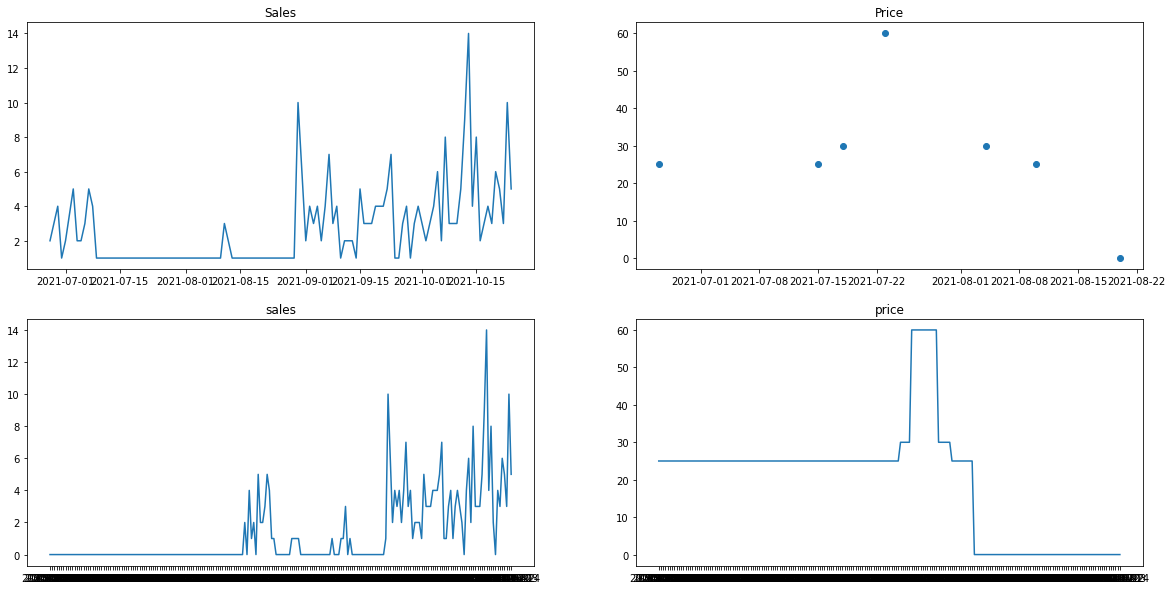

In [139]:
fig, axs = plt.subplots(2, 2,figsize=(20,10))
axs[0, 0].plot(salesofprodPre['order_date'], salesofprodPre['sales'], label = "sales")
axs[0, 0].set_title('Sales')
axs[0, 1].scatter(priceOfProdPre['created_date'], priceOfProdPre['price'], label = "price")
axs[0, 1].set_title('Price')
axs[1, 0].plot(salesofprod['date'], salesofprod['sales'], label = "sales")
axs[1, 0].set_title('sales')
axs[1, 1].plot(priceOfProd['date'], priceOfProd['price'], label = "price")
axs[1, 1].set_title('price')

In [140]:
data_fullA = pd.read_csv("A.csv") # elongate ve zeropadding olan data 

In [141]:
data_fullC = pd.read_csv("C.csv") # elongate ve zeropadding olan data 

In [200]:
salesofprodA=data_fullA[data_fullA.product_id==207940697241116].sort_values(by=['date'])
salesofprodC=data_fullC[data_fullC.product_id==data_fullC['product_id'].values[5000]].sort_values(by=['date']) # random

Text(0, 0.5, 'C(Sales)')

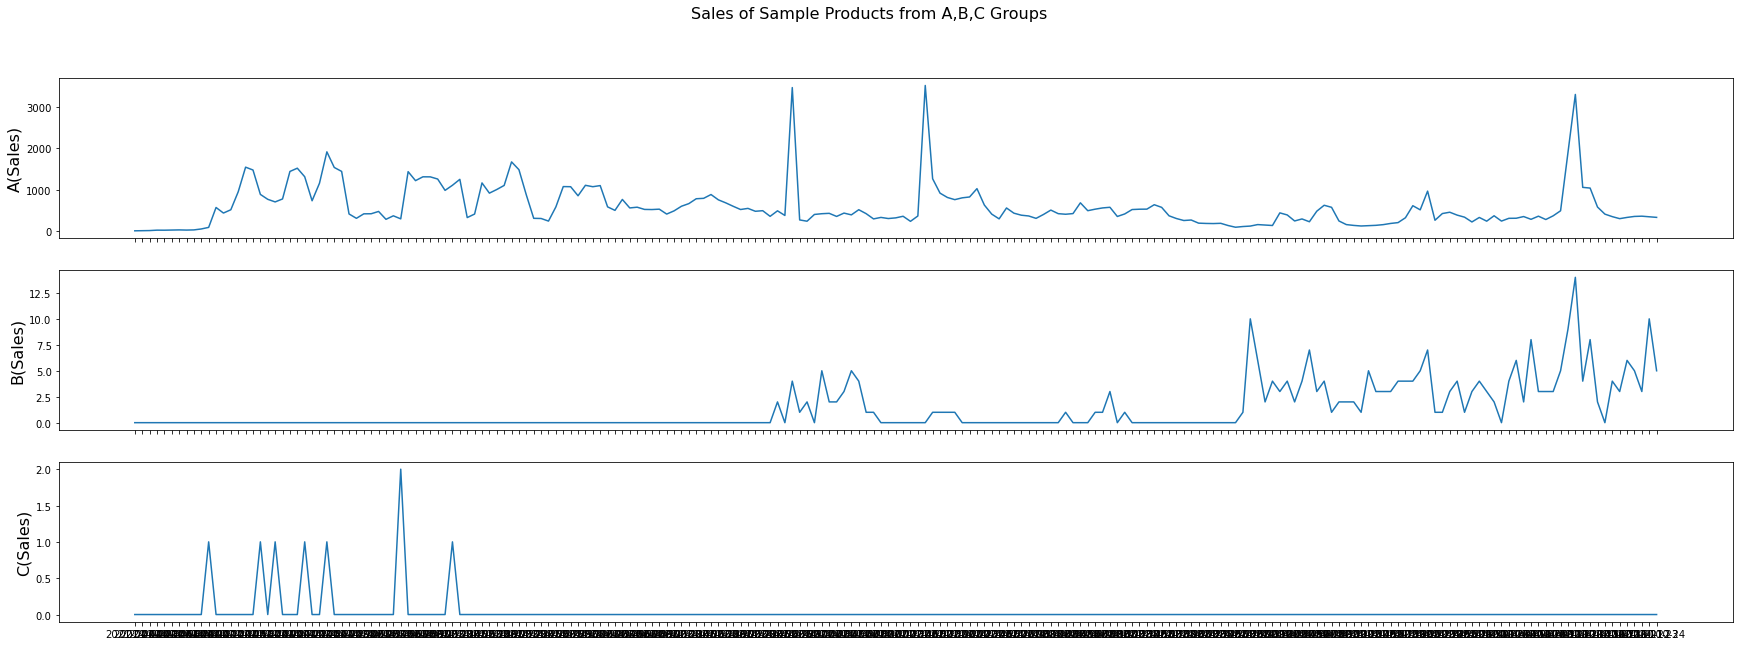

In [201]:
fig, axs = plt.subplots(3,figsize=(30,10),sharex=True)
fig.suptitle('Sales of Sample Products from A,B,C Groups',fontsize=16)
axs[0].plot(salesofprodA['date'], salesofprodA['sales'], label = "salesA")
axs[0].set_ylabel('A(Sales)', fontsize=16)
axs[1].plot(salesofprod['date'], salesofprod['sales'], label = "salesB")
axs[1].set_ylabel('B(Sales)', fontsize=16)
axs[2].plot(salesofprodC['date'], salesofprodC['sales'], label = "salesC")
axs[2].set_ylabel('C(Sales)', fontsize=16)

In [271]:
SaleDataA=data_fullA[['product_id','sales']].groupby(['product_id'],as_index=False).sum().sort_values(by=['sales'],ascending=False)
salesofprodAFastID=SaleDataA['product_id'].values[0]
salesofprodASlowID=SaleDataA['product_id'].values[-300]
salesofprodAFast=data_fullA[data_fullA.product_id==salesofprodAFastID].sort_values(by=['date'])
salesofprodASlow=data_fullA[data_fullA.product_id==salesofprodASlowID].sort_values(by=['date'])

In [282]:
SaleDataB=data_full[['product_id','sales']].groupby(['product_id'],as_index=False).sum().sort_values(by=['sales'],ascending=False)
salesofprodBFastID=SaleDataB['product_id'].values[0]
salesofprodBSlowID=SaleDataB['product_id'].values[-2500]
salesofprodBFast=data_full[data_full.product_id==salesofprodBFastID].sort_values(by=['date'])
salesofprodBSlow=data_full[data_full.product_id==salesofprodBSlowID].sort_values(by=['date'])

In [300]:
SaleDataC=data_fullC[['product_id','sales']].groupby(['product_id'],as_index=False).sum().sort_values(by=['sales'],ascending=False)
salesofprodCFastID=SaleDataC['product_id'].values[150]
salesofprodCSlowID=SaleDataC['product_id'].values[-8000]
salesofprodCFast=data_fullC[data_fullC.product_id==salesofprodCFastID].sort_values(by=['date'])
salesofprodCSlow=data_fullC[data_fullC.product_id==salesofprodCSlowID].sort_values(by=['date'])

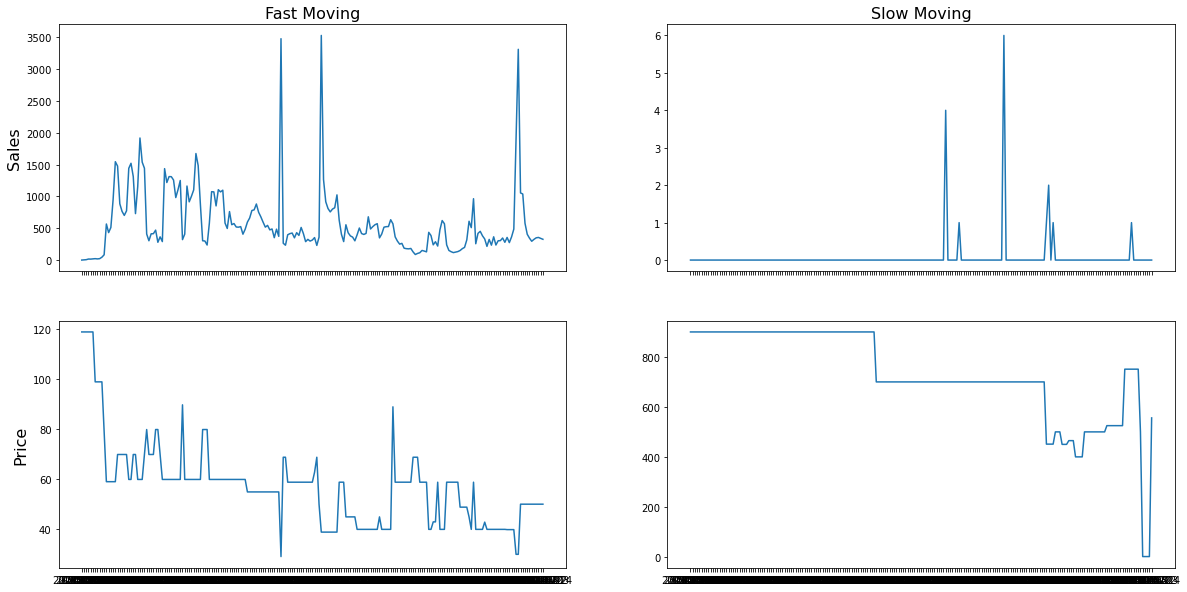

In [284]:
fig, axs = plt.subplots(2, 2,figsize=(20,10),sharex=True)
axs[0,0].set_title('Fast Moving',fontsize=16)
axs[0,0].set_ylabel('Sales', fontsize=16)
axs[0,0].plot(salesofprodAFast['date'], salesofprodAFast['sales'], label = "sales")
axs[1,0].plot(salesofprodAFast['date'], salesofprodAFast['price'], label = "price")
axs[0,1].set_title('Slow Moving',fontsize=16)
axs[1,0].set_ylabel('Price', fontsize=16)
axs[0,1].plot(salesofprodASlow['date'], salesofprodASlow['sales'], label = "sales")
axs[1,1].plot(salesofprodASlow['date'], salesofprodASlow['price'], label = "price")

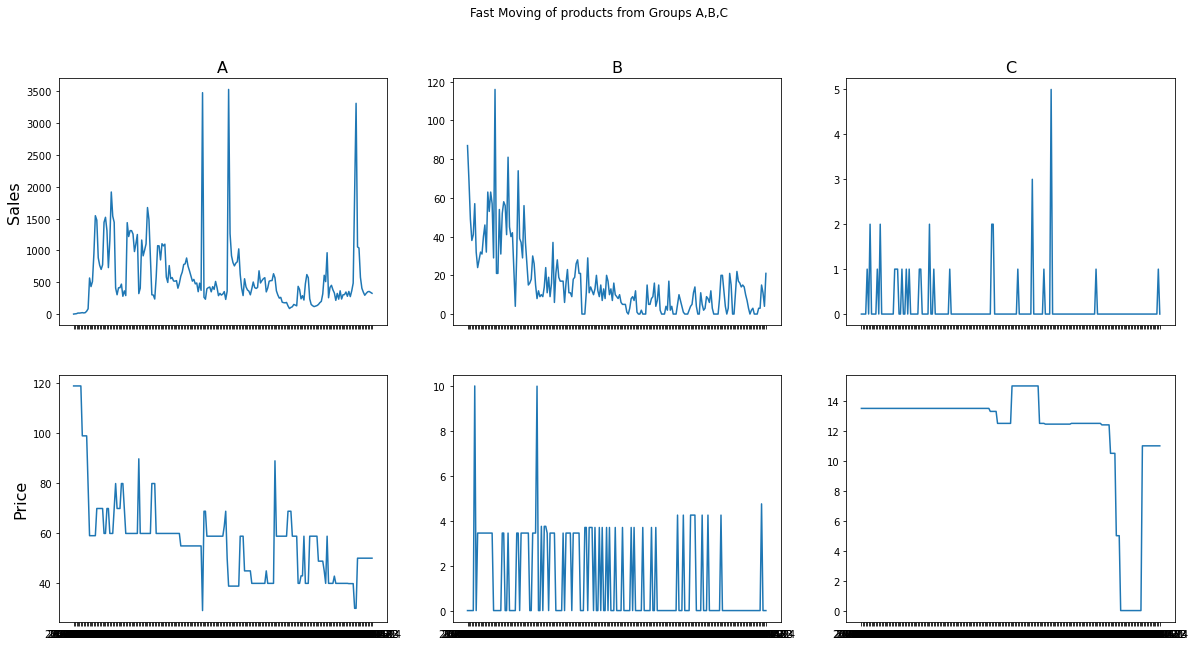

In [297]:
fig, axs = plt.subplots(2, 3,figsize=(20,10),sharex=True)
fig.suptitle('Fast Moving of products from Groups A,B,C')
axs[0,0].set_title('A',fontsize=16)
axs[0,1].set_title('B',fontsize=16)
axs[0,2].set_title('C',fontsize=16)
axs[0,0].set_ylabel('Sales', fontsize=16)
axs[1,0].set_ylabel('Price', fontsize=16)
axs[0,0].plot(salesofprodAFast['date'], salesofprodAFast['sales'], label = "sales")
axs[1,0].plot(salesofprodAFast['date'], salesofprodAFast['price'], label = "price")
axs[0,1].plot(salesofprodBFast['date'], salesofprodBFast['sales'], label = "sales")
axs[1,1].plot(salesofprodBFast['date'], salesofprodBFast['price'], label = "price")
axs[0,2].plot(salesofprodCFast['date'], salesofprodCFast['sales'], label = "sales")
axs[1,2].plot(salesofprodCFast['date'], salesofprodCFast['price'], label = "price")

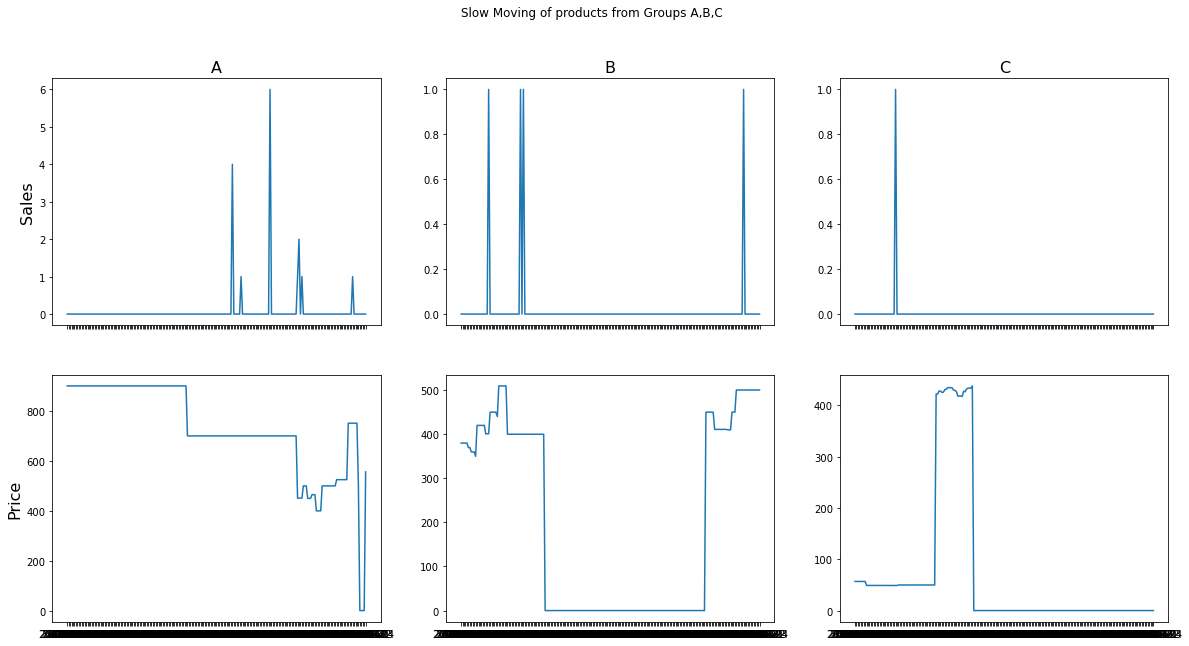

In [301]:
fig, axs = plt.subplots(2, 3,figsize=(20,10),sharex=True)
fig.suptitle('Slow Moving of products from Groups A,B,C')
axs[0,0].set_title('A',fontsize=16)
axs[0,1].set_title('B',fontsize=16)
axs[0,2].set_title('C',fontsize=16)
axs[0,0].set_ylabel('Sales', fontsize=16)
axs[1,0].set_ylabel('Price', fontsize=16)
axs[0,0].plot(salesofprodASlow['date'], salesofprodASlow['sales'], label = "sales")
axs[1,0].plot(salesofprodASlow['date'], salesofprodASlow['price'], label = "price")
axs[0,1].plot(salesofprodBSlow['date'], salesofprodBSlow['sales'], label = "sales")
axs[1,1].plot(salesofprodBSlow['date'], salesofprodBSlow['price'], label = "price")
axs[0,2].plot(salesofprodCSlow['date'], salesofprodCSlow['sales'], label = "sales")
axs[1,2].plot(salesofprodCSlow['date'], salesofprodCSlow['price'], label = "price")

In [290]:
dates=np.sort(datas['salesData']['order_date'].unique())
salesZeros=np.repeat(0, 207)
priceZeros=np.repeat(0, 207)

Text(0, 0.5, 'Price')

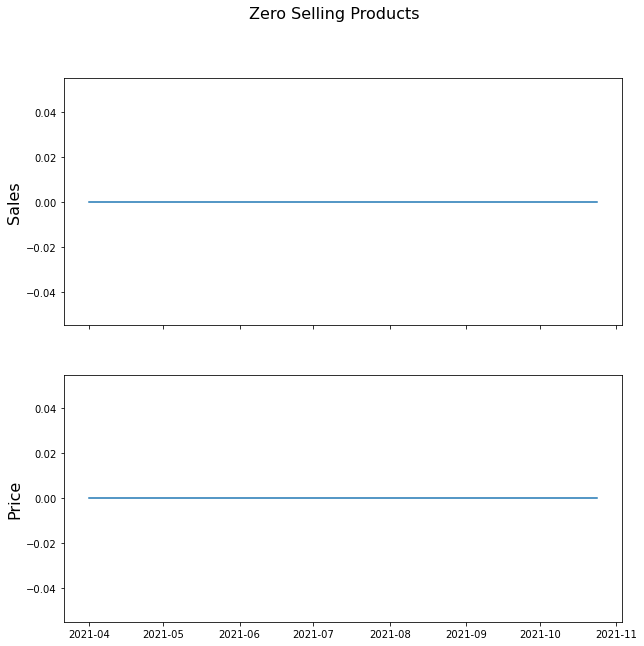

In [293]:
fig, axs = plt.subplots(2,figsize=(10,10),sharex=True)
fig.suptitle('Zero Selling Products',fontsize=16)
axs[0].plot(dates, salesZeros)
axs[0].set_ylabel('Sales', fontsize=16)
axs[1].plot(dates, priceZeros)
axs[1].set_ylabel('Price', fontsize=16)